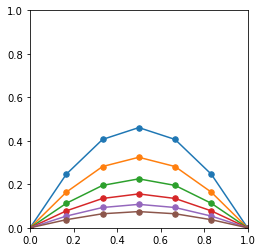

In [2]:
#拡散方程式(陰公式)
#学籍番号:1203033123
#氏名:西田裕一

import matplotlib
import matplotlib.pyplot as plt

def Gauss(N,A,y):
    x=[0]*N
    
    for k in range(N-1):
        m=0
        for i in range (k,N):
            if m < abs(A[i][k]):
                m = abs(A[i][k])
                l=i
            if l!=k:
                for n in range(k,N):
                    A[k][n],A[l][n] = A[l][n],A[k][n]
                y[k],y[l] = y[l],y[k]
        for i in range(k+1,N):
            alpha = A[i][k]/A[k][k]
            for j in range(k+1,N):
                A[i][j]-=alpha*A[k][j]
            y[i]-=alpha*y[k]
        
    x[N-1] = y[N-1]/A[N-1][N-1]
    
    for i in range(N-2,-1,-1):
        s=0
        for k in range (i+1,N):
            s +=A[i][k]*x[k]
        x[i]=(y[i]-s)/A[i][i]
    return x

def Phi(x):
    return 2*x*(1-x)

N = 6 #空間分割数
M = 100 #時間分割数
T = 1 #時刻の上限
draw = [0,4,8,12,16,20] #表示するステップ


dx = 1/N
dt = 1/M
a = dt/(dx*dx)

x = [0]*(N+1)
for i in range(N+1):
    x[i] = i*dx


U = [0]*(N+1)
for j in range(N+1):
    U[j] = Phi(j*dx)


fig = plt.figure()
graph = fig.add_subplot()
graph.set_xlim([0,1])
graph.set_ylim([0,1])
graph.set_aspect('equal')


for n in range(M):
    A=[]
    for i in range(N-1):
        A += [[0]*(N-1)]
    for i in range(N-1):
        A[i][i] = 1+2*a
    
    for i in range(N-2):
        A[i][i+1] = -a
        A[i+1][i] = -a
    
    y = [0]*(N-1)
    for i in range(N-1):
        y[i] = U[i+1]
    U = [0]+Gauss(N-1,A,y) +[0]

    if n in draw:
        graph.plot(x,U)
        graph.scatter(x,U,s=30)


plt.show()